<a href="https://colab.research.google.com/github/sanjana-singamsetty/Id_verification/blob/main/pan_card_tempering_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Author: Sanjana Singamsetty**
### Project 1
- goal of this project is to find wheter the pancard is original or no using computer vision
- find the structaral similirity of original pancard and pancard uploaded by user
- libraries used are skimage.metrics for structaral similarity and imutils for contours and cv2 for imageprocessings and pil for downloading and visualising image , request for urls and all

In [8]:
import cv2
import imutils
import requests
from PIL import Image
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt

! at the beginning of a line indicates that the command is a shell command that you're running in a terminal-like environment within the notebook.

In [3]:
# Create a new directory (folder)
!mkdir pancard_images
!mkdir pancard_images/images

mkdir: cannot create directory ‘pancard_images’: File exists


In [4]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

In [6]:
#check for format and size of image
print(original.format)
print(tampered.format)
print(original.size)
print(tampered.size)

JPEG
PNG
(1200, 800)
(282, 179)


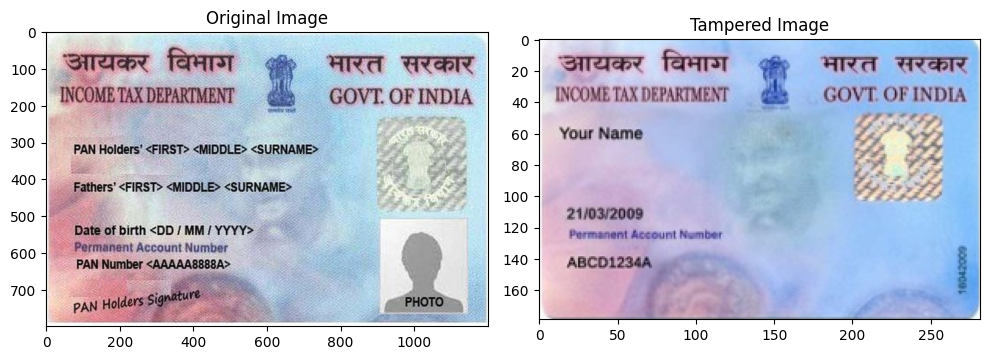

In [9]:
# Display the images side by side
plt.figure(figsize=(10, 5))  # Set the size of the figure (width: 10 units, height: 5 units)

# Create a subplot with 1 row and 2 columns, and activate the first subplot
plt.subplot(1, 2, 1)  # (1, 2, 1) means 1 row, 2 columns, and activate the first subplot
plt.imshow(original)  # Display the original image
plt.title("Original Image")  # Set the title for this subplot

# Create a subplot with 1 row and 2 columns, and activate the second subplot
plt.subplot(1, 2, 2)  # (1, 2, 2) means 1 row, 2 columns, and activate the second subplot
plt.imshow(tampered)  # Display the tampered image
plt.title("Tampered Image")  # Set the title for this subplot

plt.tight_layout()  # Adjust spacing between subplots for better layout
plt.show()  # Show the figure containing both subplots


In [14]:
original=original.resize((250,160))
print(original.size)
original.save('pancard_images/images/original.png')
tampered.save('pancard_images/images/tampered.png')

tampered=tampered.resize((250,160))
print(tampered.size)

(250, 160)
(250, 160)


resize the iages and save

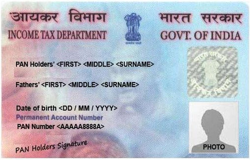

In [15]:
original

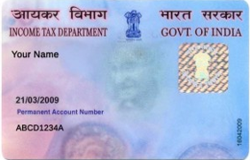

In [17]:
tampered

- The cv2.imread() function is part of the OpenCV library in Python. It is used to read images from files and load them as numpy arrays, which can then be processed and manipulated using various image processing functions provided by OpenCV.

In [18]:
original= cv2.imread('pancard_images/images/original.png')
tampered=cv2.imread('pancard_images/images/tampered.png')

converting images to grayscale
- Converting images to grayscale involves representing an image using only shades of gray, removing color information. This simplification is useful for tasks like edge detection, feature extraction, and image analysis, as variations in intensity become more noticeable.
- Grayscale images are computationally efficient, aiding in processing speed and memory usage, and they can offer clearer insights into underlying structures and patterns present in the image.
using scv functions for them to change to grayscale

In [19]:
gray_ori = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
gray_tamp = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

The Structural Similarity Index (SSIM) is a widely used metric for measuring the structural similarity between two images. It quantifies the perceived change in structural information, luminance, and contrast of an image compared to a reference image. Higher SSIM values indicate greater similarity between the images.

In Python, you can use the structural_similarity function from the skimage.metrics
- lower the ssim score lower the differences

In [22]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(gray_ori, gray_tamp, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [23]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)




```python
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
```

In this code snippet, you are calculating a binary threshold of the `diff` image (presumably, the difference image obtained from a structural similarity calculation). Then, you are detecting and extracting contours from the thresholded image.

1. `cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]`:

   This line of code applies thresholding to the `diff` image using a combination of two thresholding techniques: `cv2.THRESH_BINARY_INV` and `cv2.THRESH_OTSU`.

   - `cv2.THRESH_BINARY_INV`: This flag inverts the binary image after thresholding. It sets pixels above the threshold value to 0 and pixels below the threshold value to the maximum value (255).
   - `cv2.THRESH_OTSU`: This flag uses Otsu's method to automatically determine an optimal threshold value.

   The `[1]` after the thresholding function extracts the resulting thresholded image.

2. `cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)`:

   This line of code finds contours in the thresholded image.

   - `thresh.copy()`: This provides a copy of the thresholded image as input for contour detection.
   - `cv2.RETR_EXTERNAL`: This flag retrieves only the external contours (contours that form the boundary of objects).
   - `cv2.CHAIN_APPROX_SIMPLE`: This flag compresses horizontal, vertical, and diagonal segments and leaves only their end points, which saves memory.

3. `cnts = imutils.grab_contours(cnts)`:

   This line uses the `imutils.grab_contours()` function to extract the contours from the result of `cv2.findContours()`. The `grab_contours()` function ensures compatibility with both OpenCV 2 and OpenCV 3+.

After running this code snippet, the `thresh` image will be a binary image highlighting differences between the original and tampered images, and `cnts` will contain the detected contours that outline these differences. You can then use these contours for further processing, visualization, or analysis.

In [24]:
 # loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


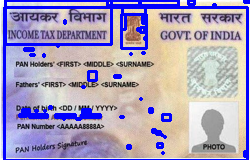

In [25]:
print('Original Format Image')
Image.fromarray(original)

tampered Format Image


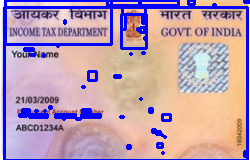

In [26]:
print('tampered Format Image')
Image.fromarray(tampered)

Different image 


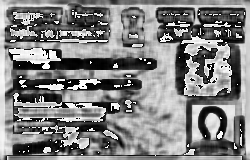

In [28]:
print("Different image ")
Image.fromarray(diff)

threshold image 


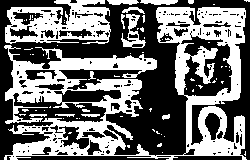

In [29]:
print("threshold image ")
Image.fromarray(thresh)